In [1]:
25*6/10

15.0

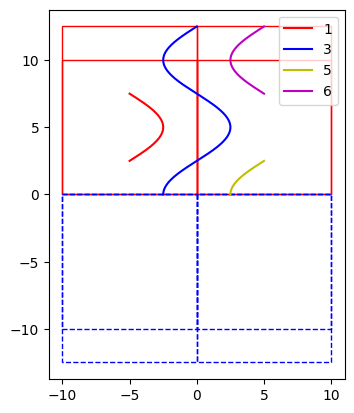

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)

lx = 10

rectangle(0,   0,  lx,  10  , 'red')
rectangle(0,   0, -lx,  10  , 'red')
rectangle(0,   0,  lx, 12.5 , 'red')
rectangle(0,   0, -lx, 12.5 , 'red')



rectangle(0,   0,  lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 500)

# =============================================================================
def fparams(t,y0):
    y = 12.5*t
    x = -R*np.cos(2*np.pi*y/T) + y0
    return x,y

x1,y1 = fparams(t1,-4*R)

y1 = t1*2*R + R
x1 = -R*np.cos(2*np.pi*y1/T) - 2*R

plt.plot(x1,y1, 'r',label="1")


x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")


y5 = t1*R 
x5 = -R*np.cos(2*np.pi*y5/T) + 2*R
plt.plot(x5,y5, 'y' ,label="5")

y6 = t1*2*R + 3*R
x6 = -R*np.cos(2*np.pi*y6/T) + 2*R
plt.plot(x6,y6, 'm' ,label="6")


# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [3]:
from gmshtools.CircRect6 import CircRect


In [4]:
import gmsh 

gmsh.initialize()

gmsh.model.add("t1")

# cilindro
Ly = 25
Lx = 60
tn  = 2.934
tl = 0.475
r  = 3*tl/8
d_Y  = 0.74297
d_SX = 0.5895

A = np.pi*r**2



R = 10/6
nx_fibres = 3

lx = 10

z0 = tn/2
dx = 0.1 
dz = 0.1

hx = R
hz = tl
Lz = 2*2*hz + 2*z0 

def CreateCylinder_Lxx(x0,z0):

    ellipse_1 = CircRect(x0, 0, z0, 
                         r, d_Y, 
                         [0,1,0] ,            # vec_z 
                         [1,0,0])             # vec_x
    
    ellipse_2 = CircRect(x0, +Ly/2, z0,
                            r, d_Y, 
                            [0,1,0] ,            # vec_z 
                            [1,0,0])             # vec_x
    gmsh.model.occ.synchronize()

    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

def CreateCylinder_Lyy(y0,z0):
    
    ellipse_1 = CircRect(-lx/2, y0, z0,
                            r, d_Y, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    ellipse_2 = CircRect(lx/2, y0, z0,
                            r, d_Y, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    gmsh.model.occ.synchronize()



    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

FM1_list = []


In [5]:

from gmshtools.CreateYarnRect import CreateYarnRect

trajs_mid = [ 
              [x3,y3]]

for itraj_2D in trajs_mid:
    trajs = np.array([[itraj_2D[0][i],
                       itraj_2D[1][i], 
                    -z0 - 3*hz/2 ] 
                    for i in range(len(itraj_2D[0]))])

    yarn = CreateYarnRect({"trajs":trajs, 
                    "r":r, 
                    "d": d_SX,
                    "density":4,
                    "skip_left":2,
                    "skip_right":4,
                    "vec_init":[0,1,0],
                    "vec_end":[0,1,0]})

    FM1_list.append(yarn["volumes"][0][1])
    print("yarn", yarn["volumes"][0][1])

# x1,y1
itraj_2D = [x1,y1]
trajs = np.array([[itraj_2D[0][i],
                    itraj_2D[1][i], 
                -z0 - 3*hz/2 ] 
                for i in range(len(itraj_2D[0]))])

yarn = CreateYarnRect({"trajs":trajs, 
                    "r":r, 
                    "d": d_SX,
                "density":4,
                "skip_left":2,
                "skip_right":3,
                "vec_init":[1  , 0 , 0],
                "vec_end" :[-1 , 0 , 0]})

FM1_list.append(yarn["volumes"][0][1])
print("yarn", yarn["volumes"][0][1])


# x5,y5
itraj_2D = [x5,y5]
trajs = np.array([[itraj_2D[0][i],
                    itraj_2D[1][i], 
                -z0 - 3*hz/2 ] 
                for i in range(len(itraj_2D[0]))])

yarn = CreateYarnRect({"trajs":trajs, 
                    "r":r, 
                    "d": d_SX,
                "density":4,
                "skip_left":2,
                "skip_right":2,
                "vec_init":[0  , 1 , 0],
                "vec_end" :[1 , 0 , 0]})
FM1_list.append(yarn["volumes"][0][1])
print("yarn", yarn["volumes"][0][1])    

# x6,y6
itraj_2D = [x6,y6]
trajs = np.array([[itraj_2D[0][i],
                    itraj_2D[1][i], 
                -z0 - 3*hz/2 ] 
                for i in range(len(itraj_2D[0]))])

yarn = CreateYarnRect({"trajs":trajs,
                    "r":r, 
                    "d": d_SX,
                "density":4,
                "skip_left":2,
                "skip_right":4,
                "vec_init":[-1 , 0 , 0],
                "vec_end" :[1 , 0 , 0]})


# gmsh.fltk.run()
# FM1_list.append(yarn["volumes"][0][1])
print("yarn", yarn["volumes"][0][1])


yarn 1
yarn 2
yarn 3
yarn 4


In [6]:
yarn

{'volumes': [(3, 4)]}

In [7]:
# gmsh.fltk.run()

In [8]:
box_cut = gmsh.model.occ.addBox(-Lx/2, -Ly/2, -Lz/2, Lx, Ly, Lz)
gmsh.model.occ.synchronize()

yarn_cut = gmsh.model.occ.intersect(yarn["volumes"], [(3,box_cut)])
gmsh.model.occ.synchronize()

# gmsh.fltk.run()

FM1_list.append(yarn_cut[0][0][1])



In [9]:

gmsh.model.occ.synchronize()
# 
#

nfilaments = int(0.5*25*6/10)

yspan = np.arange(0, Ly/2 - hx, hx)
yspan = yspan + hx/2

FM2_list = []
for iy in yspan:
    FibreMinus_02 = CreateCylinder_Lyy(iy, -z0 - hz/2 )

    FM2_list.append(FibreMinus_02)

FM2_list.extend(FM1_list)




# Identificamos las fibras
fibres_tags = np.concatenate([FM1_list, FM2_list])
f1 = gmsh.model.addPhysicalGroup(3, fibres_tags)
gmsh.model.setPhysicalName(3, f1, "Fibres")


gmsh.model.occ.synchronize()
box_01 = gmsh.model.occ.addBox(-Lx/2, 0 , + z0 ,
                                Lx   ,  Ly/2   ,  2*hz    )

box_02 = gmsh.model.occ.addBox(-lx/2, 0 , - z0 ,
                                lx   ,  Ly/2   ,  -2*hz    )

gmsh.model.occ.synchronize()


box_02_cut = gmsh.model.occ.cut([(3, box_02)], 
                   [(3,i) for i in FM2_list],
                   removeTool=False)

gmsh.model.occ.synchronize()

In [10]:
# gmsh.fltk.run()


In [11]:


# # box 
# #
# gmsh.model.occ.synchronize()
# #

box_big_mid = gmsh.model.occ.addBox(-Lx/2      , 0     , -z0,
                                     Lx   ,  Ly/2   ,  2*z0    )


box_sup = gmsh.model.occ.addBox(-Lx/2       ,   0     , z0 + hz,
                                 Lx    ,  Ly/2   ,  hz       )

# partition with rectangle 

# (0, Ly/2,  z0 + 2*hz)
# (0, Ly/2, -z0 - 2*hz)
# (0, -Ly/2, -z0 - 2*hz)
# (0, -Ly/2,  z0 + 2*hz)

p1_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 + 2*hz)
p2_rect = gmsh.model.occ.addPoint(0, Ly/2, -z0 - 2*hz)
p3_rect = gmsh.model.occ.addPoint(0, 0   , -z0 - 2*hz)
p4_rect = gmsh.model.occ.addPoint(0, 0   ,  z0 + 2*hz)

gmsh.model.occ.synchronize()

l1 =  gmsh.model.occ.addLine(p1_rect, p2_rect)
l2 =  gmsh.model.occ.addLine(p2_rect, p3_rect)
l3 =  gmsh.model.occ.addLine(p3_rect, p4_rect)
l4 =  gmsh.model.occ.addLine(p4_rect, p1_rect)

gmsh.model.occ.synchronize()

ll = gmsh.model.occ.addCurveLoop([l1,l2,l3,l4])
gmsh.model.occ.synchronize()

ss = gmsh.model.occ.addPlaneSurface([ll])
gmsh.model.occ.synchronize()

# gmsh.fltk.run()

box_sup = gmsh.model.occ.fragment([(3,box_sup)], [(2,ss)])
gmsh.model.occ.synchronize()

# gmsh.fltk.run()

box_inf = gmsh.model.occ.addBox(-Lx/2       ,   0     , -z0 - hz,
                                 Lx    ,  Ly/2   ,  -hz       )

gmsh.model.occ.synchronize()
volumes = gmsh.model.getEntities(3)



box_big = gmsh.model.occ.addBox(-Lx/2,  0      , -Lz/2,
                                 Lx  ,  Ly/2   ,  Lz    )

gmsh.model.occ.synchronize()

# cut box_big - volumes
box_big = gmsh.model.occ.fragment([(3,box_big)], volumes)



gmsh.model.occ.synchronize()


# buscar la caja que tiene como media z= 0


In [12]:
# gmsh.fltk.run()


In [13]:
gmsh.model.occ.synchronize()
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) 
       for i in volumes ]
#encontart volumenes con yCOM > 12.5
volumes = [volumes[i] for i in range(len(volumes)) if com[i][1] > 12.5]
# eliminar volumenes
gmsh.model.occ.remove([i for i in volumes],recursive=True)
gmsh.model.occ.synchronize()

In [14]:
volumes

[]

In [15]:
# gmsh.fltk.run()


In [16]:
# Identificamos el nucleo
# Este es el volumen con menor valor de z en valor absoluto
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) 
       for i in volumes ]


sort_com_index = np.argsort(np.abs(np.array(com)[:,2]))

id_nucleo = volumes[sort_com_index[0]][1]
# physical group
f2 = gmsh.model.addPhysicalGroup(3, [id_nucleo])
gmsh.model.setPhysicalName(3, f2, "Nucleo")
# 
gmsh.model.occ.synchronize()

In [17]:


# Selecionamos todos los volumenes que no sean ni fibras ni nucleo
resina = [ i[1] for i in volumes if i[1] != id_nucleo ]
resina = [ i for i in resina if i not in fibres_tags]


# sort by x
com = [ gmsh.model.occ.getCenterOfMass(3, i) 
       for i in resina ]

sort_com_index = np.argsort(np.abs(np.array(com)[:,0]))

resina = [resina[i] for i in sort_com_index]


In [18]:
layers_centrales = resina[:4]


com_centrals = [ gmsh.model.occ.getCenterOfMass(3, i)
         for i in layers_centrales ]

# sort by z
sort_com_index = np.argsort(np.array(com_centrals)[:,2])
layers_centrales = [layers_centrales[i] for i in sort_com_index]

resina = layers_centrales[:2]

f3 = gmsh.model.addPhysicalGroup(3, resina)
gmsh.model.setPhysicalName(3, f3, "Resina")


In [19]:
layers_centrales

[19, 20, 22, 15]

In [20]:

volumes = gmsh.model.getEntities(3)
volumes = [ i for i in volumes if i[1] not in resina]
volumes = [ i for i in volumes if i[1] not in fibres_tags]
volumes = [ i for i in volumes if i[1] != id_nucleo]


In [21]:
com = [ abs(gmsh.model.occ.getCenterOfMass(3, i[1])[2])
         for i in volumes ]
com = np.array(com)
com = np.round(com, 2)
com_unique = np.unique(com)
com_unique = np.sort(com_unique)

In [22]:

capas_1 = [ i[1] for i,ic in zip(volumes, com) if ic == com_unique[0]]
capas_2 = [ i[1] for i,ic in zip(volumes, com) if ic == com_unique[1]]

In [23]:
capas_1

[18, 22, 23]

In [24]:
capas_2

[15, 16, 17, 21]

In [25]:


f4 = gmsh.model.addPhysicalGroup(3, capas_2)
gmsh.model.setPhysicalName(3, f4, "CAPAS_2")

f5 = gmsh.model.addPhysicalGroup(3, capas_1)
gmsh.model.setPhysicalName(3, f5, "CAPAS_1")


#

In [26]:
# gmsh.fltk.run()



In [27]:
def BoxRefine(x1,x2,y1,y2,z1,z2,vin,vout,Thickness=0.25):
    

    field_tag = gmsh.model.mesh.field.add("Box")

    gmsh.model.mesh.field.setNumber(field_tag, "VIn", vin)
    gmsh.model.mesh.field.setNumber(field_tag, "VOut", vout)

    gmsh.model.mesh.field.setNumber(field_tag, "XMin", x1)
    gmsh.model.mesh.field.setNumber(field_tag, "XMax", x2)

    gmsh.model.mesh.field.setNumber(field_tag, "YMin", y1)
    gmsh.model.mesh.field.setNumber(field_tag, "YMax", y2)

    gmsh.model.mesh.field.setNumber(field_tag, "ZMin", z1)
    gmsh.model.mesh.field.setNumber(field_tag, "ZMax", z2)

    # Thickness
    gmsh.model.mesh.field.setNumber(field_tag, "Thickness", Thickness)

    return field_tag

In [28]:
#field
gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 9) # 20

mesh_inter = 1.5*r
mesh_min = 2.0*r 
mesh_max = 7.0*r
mesh_out = 10.0*r

dx_per = 1.05
#  
field_base = BoxRefine(-Lx/2    ,  Lx/2, 
                       0    ,  Ly/2, 
                      -Lz/2 ,  Lz/2,
                    mesh_out, mesh_out)

field_mid = BoxRefine(- dx_per*nx_fibres*hx    ,   dx_per*nx_fibres*hx,
                          0    ,  Ly/2, 
                            -z0 - 2*hz, -z0,
                      mesh_min, mesh_out)

field_curves = BoxRefine(- dx_per*nx_fibres*hx    ,   dx_per*nx_fibres*hx,
                          0    ,  Ly/2, 
                            -z0 - 2*hz, -z0 -hz,
                      0.5*mesh_min, mesh_out,Thickness=0.1)

field_x = BoxRefine(-Lx/2    , -Lx/2 + 1,
                       0    ,  0.05*Ly/2, 
                    -z0 - 2*hz, -z0,
                    0.2*mesh_min, mesh_out)

list_field = [field_base, field_mid, field_curves]

field_min = gmsh.model.mesh.field.add("Min")
gmsh.model.mesh.field.setNumbers(field_min, "FieldsList", list_field)

gmsh.model.mesh.field.setAsBackgroundMesh(field_min)


In [29]:
# gmsh.fltk.run()

In [30]:

gmsh.model.mesh.generate(3)
# optimize
# second order 
gmsh.model.mesh.optimize("Netgen",force=False)
gmsh.model.mesh.setOrder(2)

gmsh.write("t1.inp")

In [31]:
import pandas as pd
path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\df_pred.csv"
df_pred = pd.read_csv(path, sep=",")
df_pred

path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\01_optim\mat.csv"
df_mat = pd.read_csv(path, sep=",")
df_mat

df_layers = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\01_optim\layers.csv"
df_layers = pd.read_csv(df_layers, sep=",")
df_layers

,Unnamed: 0,Evec [GPa]
0,X,10.156514
1,SX,8.410847
2,Y,21.993829
3,SY,8.379982
4,Nucleo,0.880000


In [32]:
E1 = 1e3*df_layers.loc[2].values[1] 
E2 = 1e3*df_layers.loc[1].values[1]  

Ec = 1e3*df_mat.loc[1].values[1] 

nu = 0.3 
Em = 1e3*df_mat.loc[0].values[1] 
En = 880


In [33]:
from djccx.inp.inp import  inp 

inp_f = inp("t1.inp")

inp_f.remove_by_type(2)

nodes = inp_f.nodes.df

# nodes_sym = nodes.copy()
# nodes_sym = nodes_sym[ nodes_sym["x"] < 1e-3] 

# nset_sym_x = inp_f.CreateNsetFromIds(nodes_sym.index, "sym_x")

nodes_sym = nodes.copy()
nodes_sym = nodes_sym[ nodes_sym["y"] < 1e-3] 

nset_sym_y = inp_f.CreateNsetFromIds(nodes_sym.index, "sym_y")

nodes_fixed = nodes.copy()
nodes_fixed = nodes_fixed[ nodes_fixed["x"] > 0.5*Lx  - 1e-1]
nodes_fixed = nodes_fixed[ nodes_fixed["z"] < -0.5*Lz + 1e-1]

nset_fixed = inp_f.CreateNsetFromIds(nodes_fixed.index, "fixed")


nodes_fixed_minus = nodes.copy()
nodes_fixed_minus = nodes_fixed_minus[ nodes_fixed_minus["x"] < -0.5*Lx + 1e-1]
nodes_fixed_minus = nodes_fixed_minus[ nodes_fixed_minus["z"] < -0.5*Lz + 1e-1]

nset_fixed_minus = inp_f.CreateNsetFromIds(nodes_fixed_minus.index, "fixed_minus")

nodes_force = nodes.copy()
nodes_force = nodes_force[ nodes_force["x"]  < 1e-1 ]
nodes_force = nodes_force[ nodes_force["x" ] > -1e-1]
nodes_force = nodes_force[ nodes_force["z"]  > 0.5*Lz - 1e-1]

nset_force = inp_f.CreateNsetFromIds(nodes_force.index, "force")

# materials 
mat_fibras = inp_f.CreateElasticMaterial("FIBRES", Ec, nu)
mat_resina = inp_f.CreateElasticMaterial("RESINA", Em, nu)
mat_capas_1 = inp_f.CreateElasticMaterial("CAPAS_1", E1, nu)
mat_capas_2 = inp_f.CreateElasticMaterial("CAPAS_2", E2, nu)
mat_nucleo = inp_f.CreateElasticMaterial("NUCLEO", En, nu)


# elsets 
fibres_elset = inp_f.select("FIBRES","elset")
resina_elset = inp_f.select("RESINA","elset")
capas_1_elset = inp_f.select("CAPAS_1","elset")
capas_2_elset = inp_f.select("CAPAS_2","elset")
nucleo_elset = inp_f.select("NUCLEO","elset")

inp_f.CreateSolidSection( fibres_elset, mat_fibras)
inp_f.CreateSolidSection( resina_elset, mat_resina)
inp_f.CreateSolidSection( capas_1_elset, mat_capas_1)
inp_f.CreateSolidSection( capas_2_elset, mat_capas_2)
inp_f.CreateSolidSection( nucleo_elset, mat_nucleo)
#

istep = inp_f.CreateStaticStep()
istep.CreateBoundary(nset_fixed,3,0)
istep.CreateBoundary(nset_fixed_minus,3,0)
istep.CreateBoundary(nset_sym_y,2,0)

disp = 5
istep.CreateBoundary(nset_force, 3, -disp)


inp_f.print("t1_new.inp")

In [34]:
fibres_elset = inp_f.select("FIBRES","elset")


In [35]:
inp_f.elsets

[Card (*ELSET) :FIBRES,
 Card (*ELSET) :NUCLEO,
 Card (*ELSET) :RESINA,
 Card (*ELSET) :CAPAS_2,
 Card (*ELSET) :CAPAS_1]

In [36]:
inp_f.run("output")

Running Calculix at:  output
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\02_metodo\02_flexion\TPF3\output\out.txt
Command:
 C:\Program Files\Microsoft MPI\Bin\mpiexec -n 4 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  5512 

Calculix finished



{'data':           node         x             y        z        D1        D2        D3  \
 node                                                                            
 1            1  -2.85373  0.000000e+00 -2.35763 -0.075708  0.000000 -4.835250   
 2            2  -2.85373  0.000000e+00 -2.00137 -0.058541  0.000000 -4.836480   
 3            3  -2.64746  6.188850e-01 -2.00137 -0.055486  0.001499 -4.847500   
 4            4  -2.64746  6.188850e-01 -2.35763 -0.071463  0.001106 -4.846190   
 5            5  -2.50000 -1.000000e-08 -2.00137 -0.056773  0.000000 -4.853300   
 ...        ...       ...           ...      ...       ...       ...       ...   
 374235  374235   6.34158  3.369760e-01 -1.80965  0.127034 -0.001102 -4.522500   
 374236  374236   5.05976  1.048460e+00 -1.89089  0.107409 -0.004387 -4.652440   
 374237  374237  22.53470  1.126740e+01 -1.82109  0.336303 -0.022207 -1.819920   
 374238  374238  28.92280  3.504130e+00 -1.82601  0.365010 -0.003056 -0.290801   
 374239 